##### <div style="color:brown;background-color:gold;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Retail Sales</div>

## <a id="100" style="color:gold">Importing packages :</a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

 ## <a id="100" style="color:gold">Loading Dataset :</a>

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100

In [4]:
df.describe()

Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

In [5]:
df.tail()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120

In [6]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

 ## <a id="100" style="color:gold">Exploratory Data Analysis (EDA) :</a>

### Checking Null Values

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Dividing Age Category

In [10]:
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['0-18', '19-25', '26-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

## <a id="100" style="color:gold">Data Visualization :</a>

### Product Category Purchase by Age Group

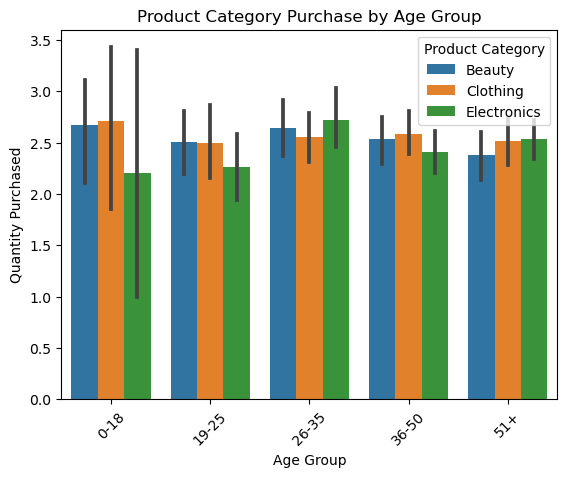

In [11]:
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=df)
plt.title('Product Category Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)  
plt.show()

### Age Distribution Graphs 

In [12]:
df1 = df['Gender']
fig = px.pie(df1,names='Gender',title='Gender Distribution')
fig.show()

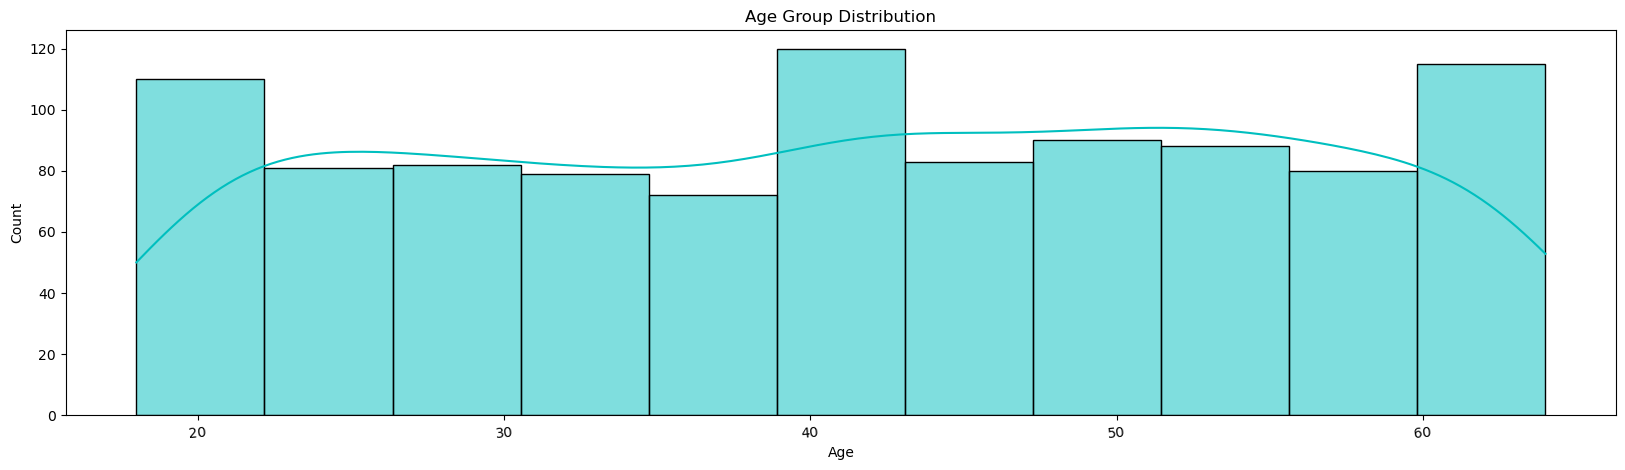

In [13]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x=df['Age'].sort_values(),kde=True,color='c')
plt.title('Age Group Distribution')
plt.xticks(rotation=5)
plt.show()

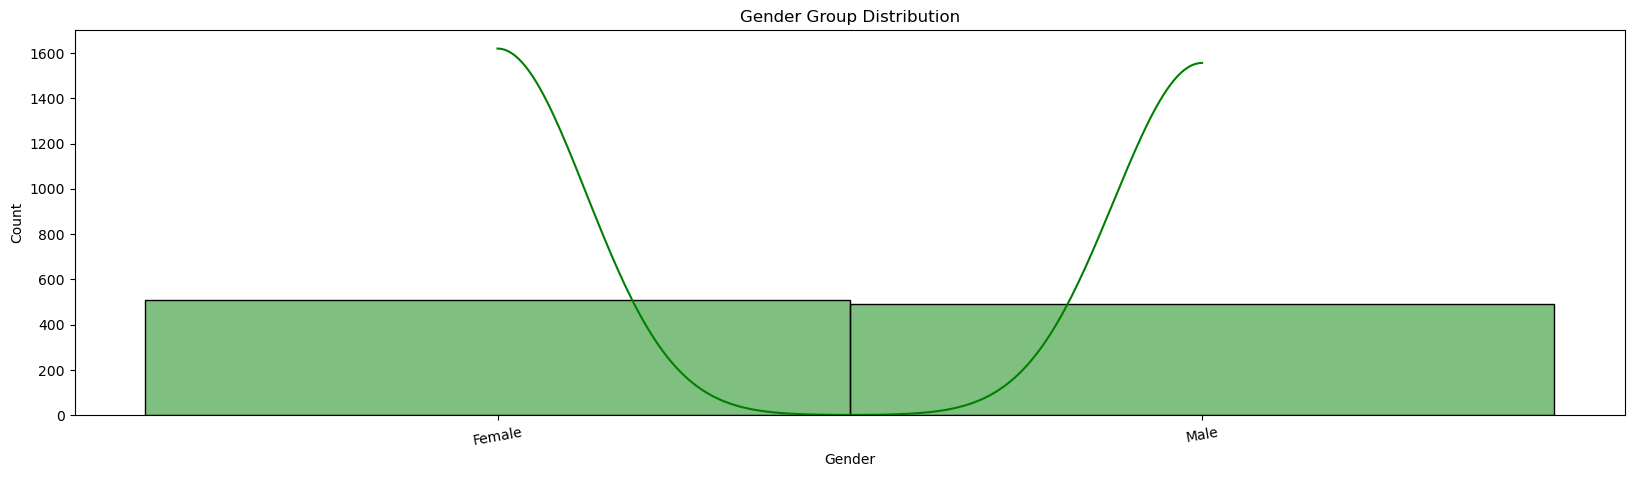

In [14]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x=df['Gender'].sort_values(),kde=True,color='g')
plt.title('Gender Group Distribution')
plt.xticks(rotation=10)
plt.show()

In [15]:
plot = px.violin(x=df['Gender'],y=df['Age'],box=True,points='all')
plot.update_traces(box_fillcolor='green',opacity=0.5)
plot.update_layout(title='Gender & Age Group Distribution',xaxis_title='Gender',yaxis_title='Age Group')
plot.show()

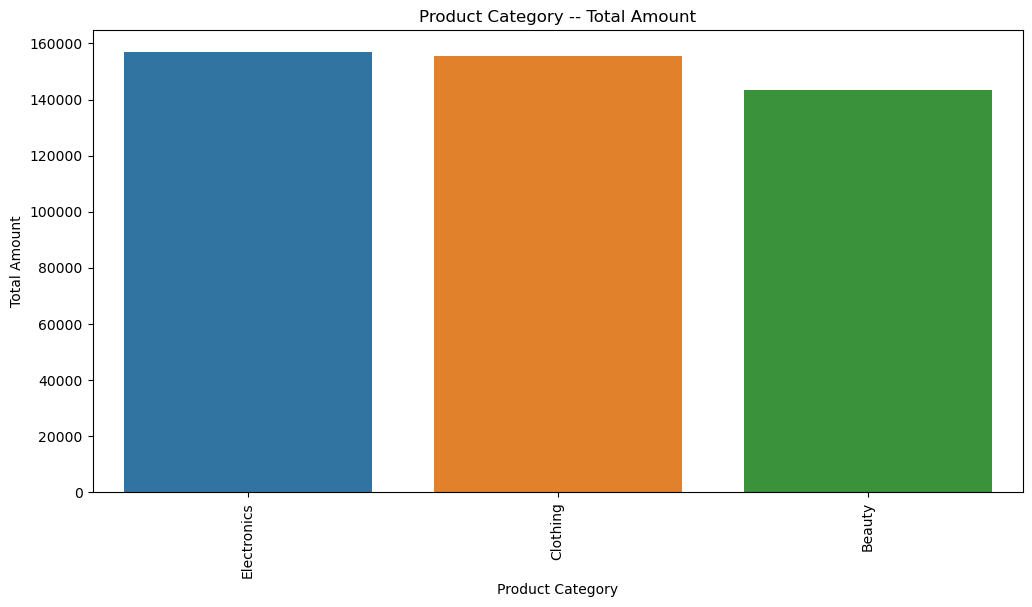

In [16]:
Gold_item_net_wt = df.groupby('Product Category')['Total Amount'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(x=Gold_item_net_wt.index,y=Gold_item_net_wt.values)
plt.xticks(rotation=90)
plt.title("Product Category -- Total Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

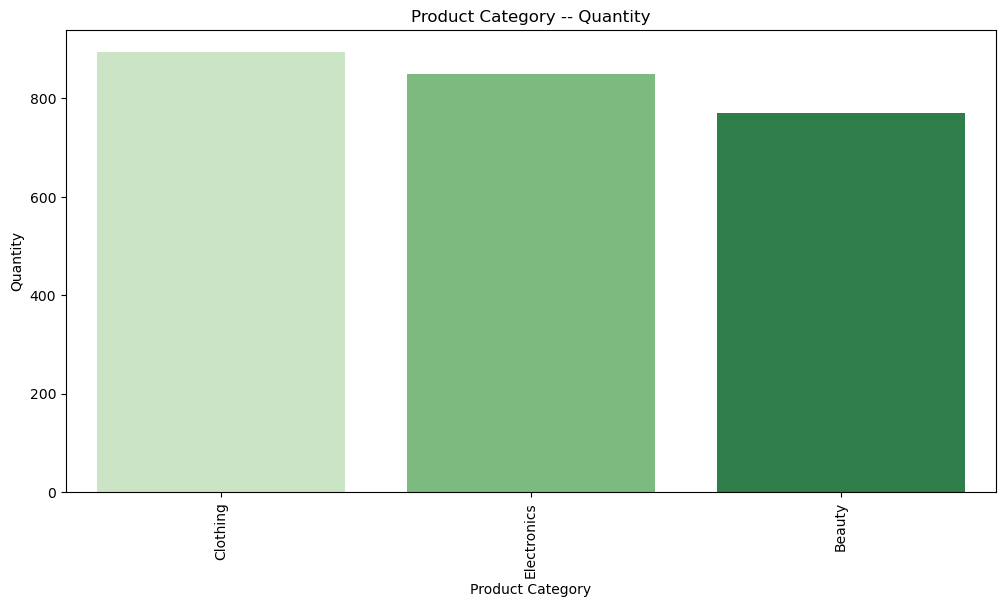

In [17]:
Gold_item_net_wt = df.groupby('Product Category')['Quantity'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(x=Gold_item_net_wt.index, y=Gold_item_net_wt.values, palette='Greens')
plt.xticks(rotation=90)
plt.title("Product Category -- Quantity")
plt.xlabel("Product Category")
plt.ylabel("Quantity")
plt.show()

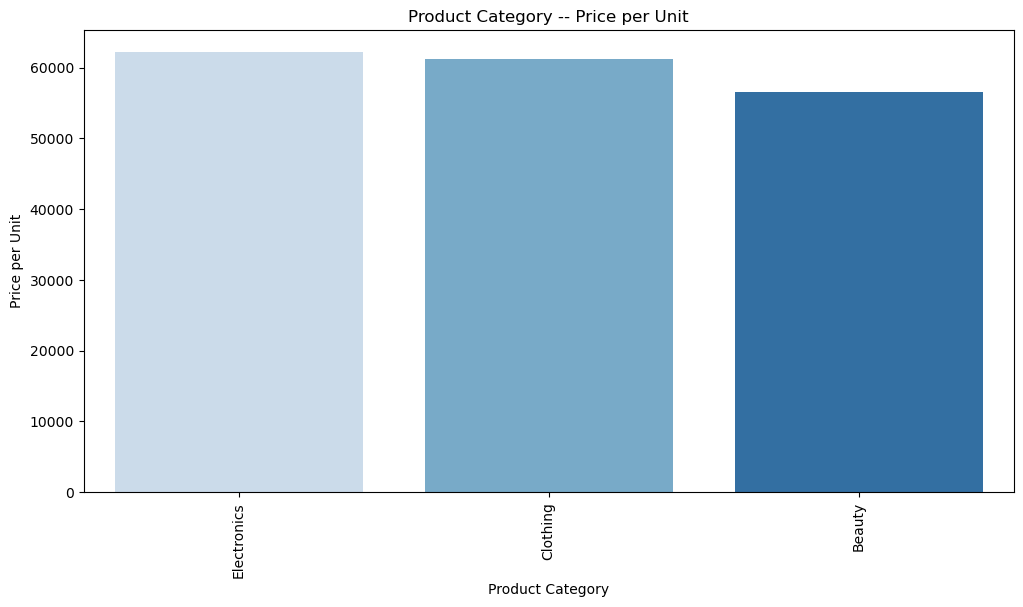

In [18]:
Gold_item_net_wt = df.groupby('Product Category')['Price per Unit'].sum().nlargest(40)
plt.figure(figsize=(12, 6))
sns.barplot(x=Gold_item_net_wt.index, y=Gold_item_net_wt.values, palette='Blues')
plt.xticks(rotation=90)
plt.title("Product Category -- Price per Unit")
plt.xlabel("Product Category")
plt.ylabel("Price per Unit")
plt.show()

### Time Series Data 

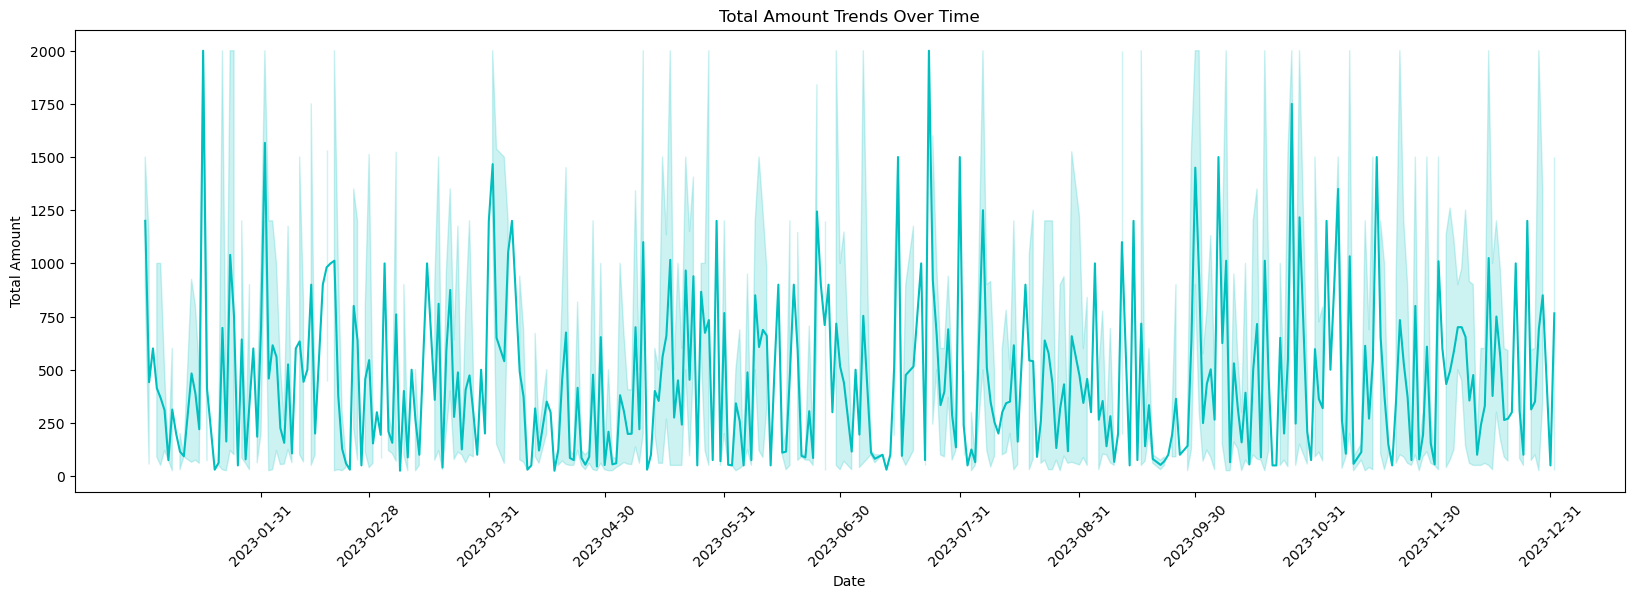

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Date', y='Total Amount', color='c')
plt.title("Total Amount Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
date_ticks = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='M')  # Adjust the frequency as needed
plt.xticks(date_ticks, rotation=45)
plt.show()

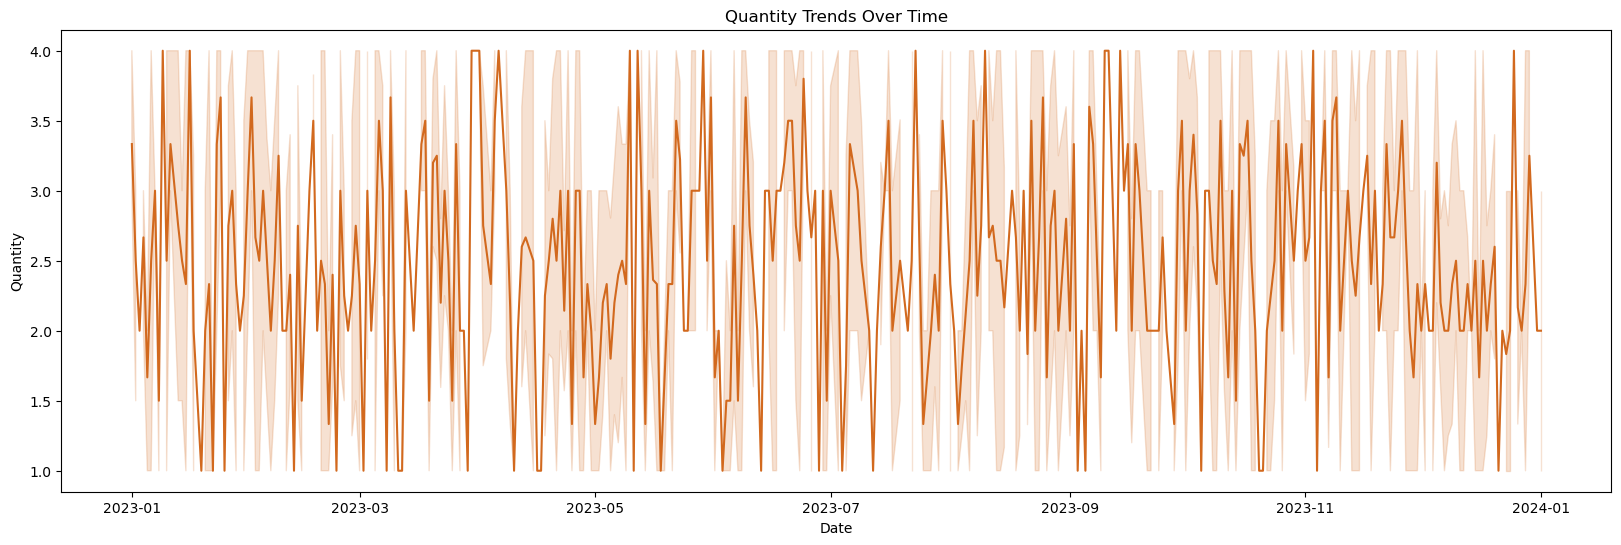

In [20]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x=df['Date'], y=df['Quantity'], color='chocolate')
plt.title("Quantity Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()

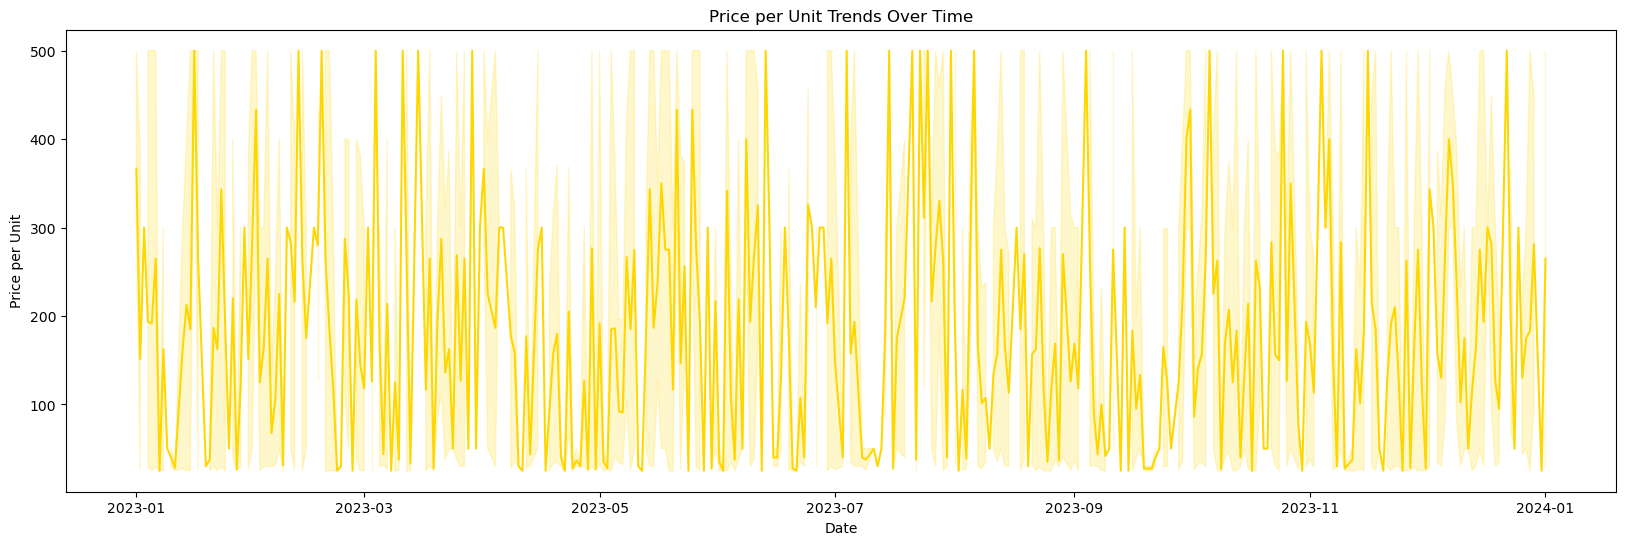

In [21]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x=df['Date'], y=df['Price per Unit'], color='gold')
plt.title("Price per Unit Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price per Unit")
plt.show()

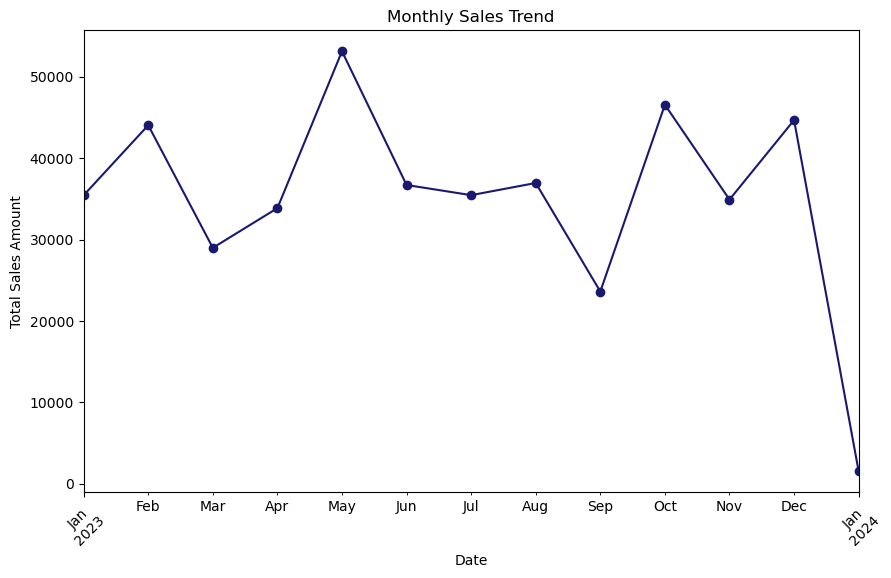

In [22]:
plt.figure(figsize=(10, 6))
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o', color='midnightblue')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

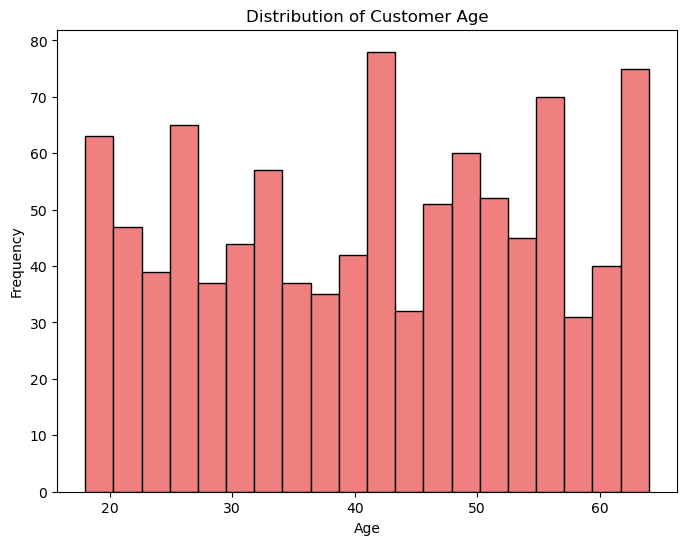

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

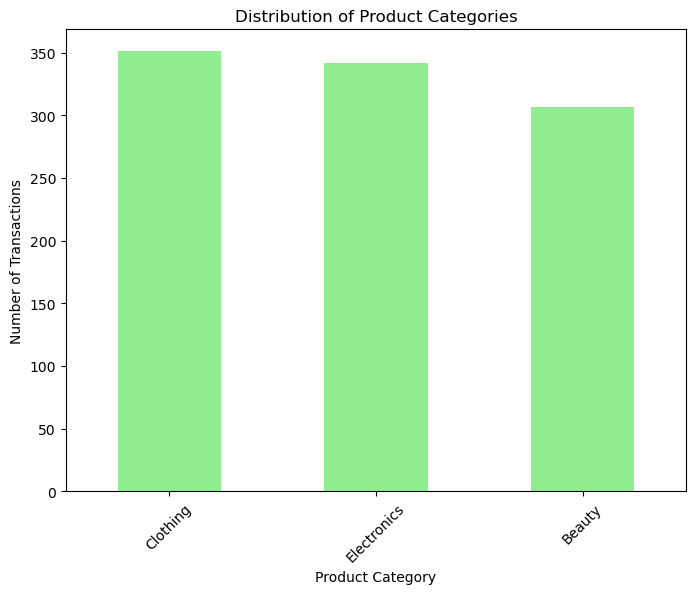

In [24]:
plt.figure(figsize=(8, 6))
product_counts = df['Product Category'].value_counts()
product_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

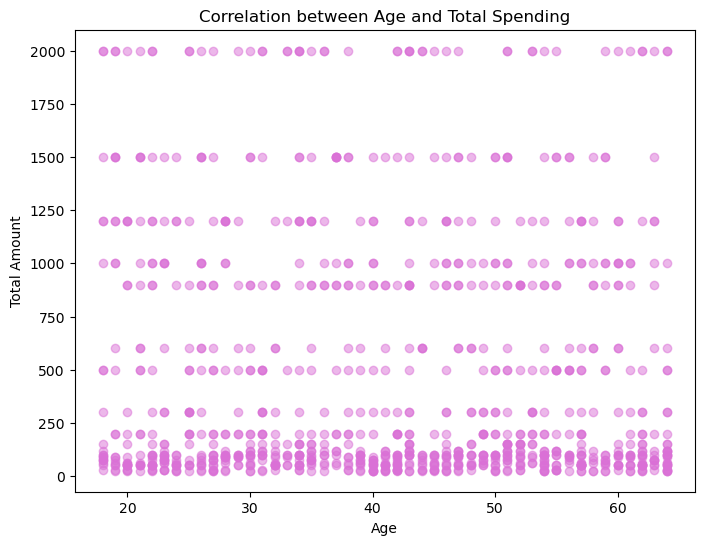

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total Amount'], alpha=0.5, color='orchid')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Correlation between Age and Total Spending')
plt.show()

### Pairplot

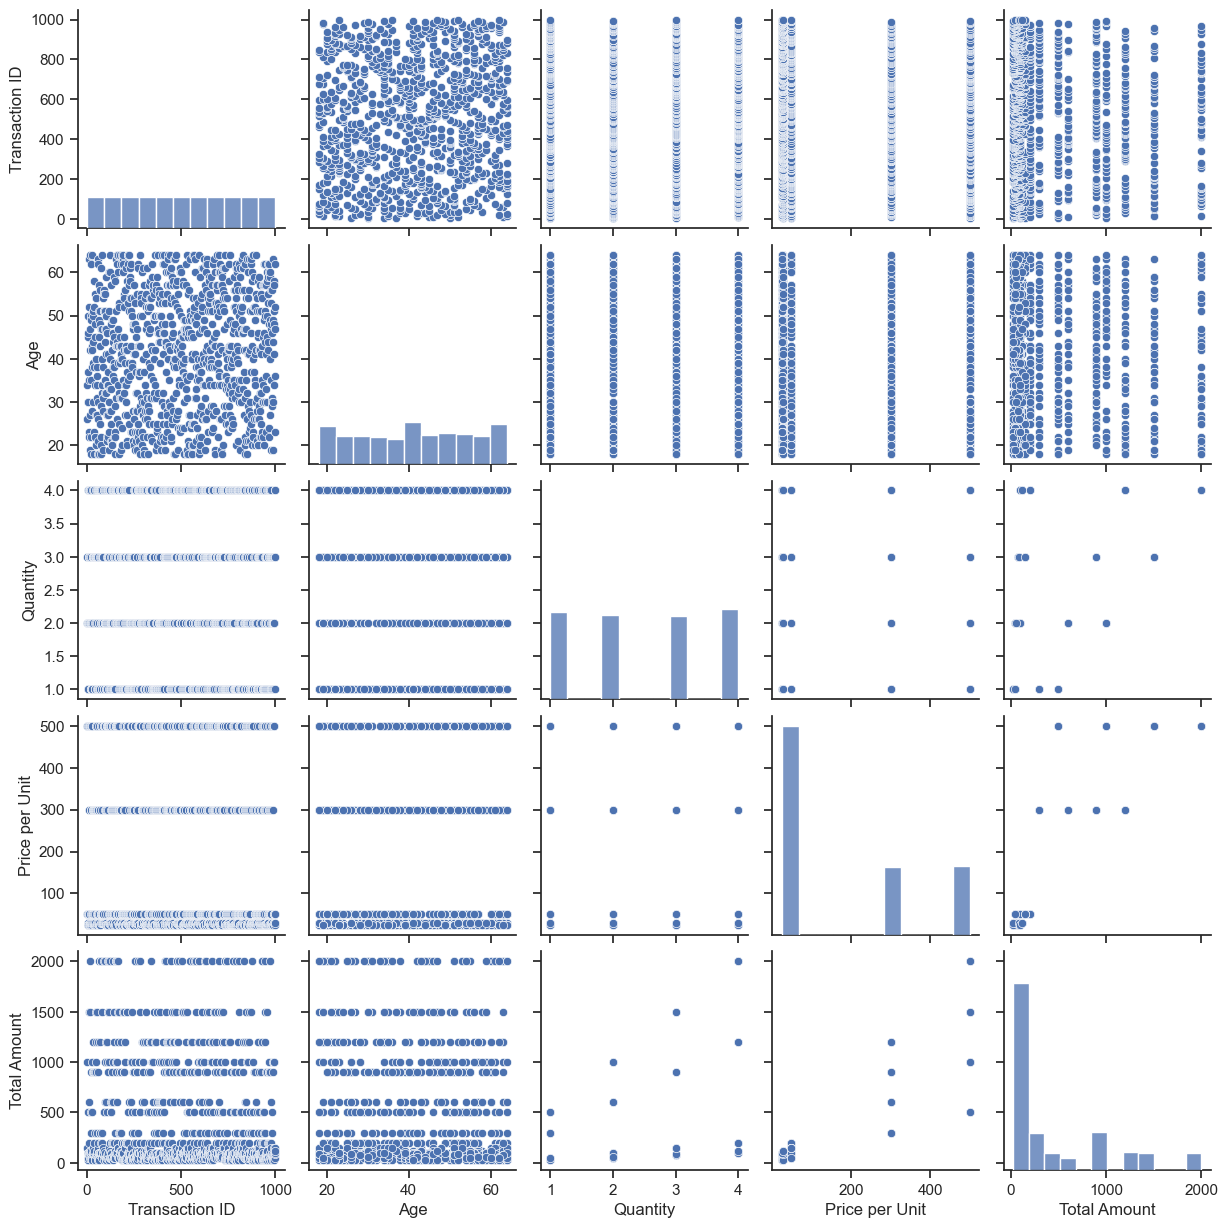

In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, palette='YlOrRd')
plt.show()

### Correlation

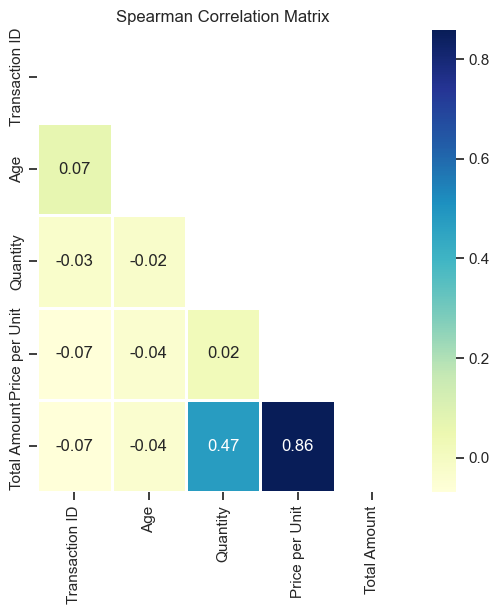

In [27]:
# Select only the numeric columns for correlation
numeric_columns = df.select_dtypes(include=['int64']).columns
corr = df[numeric_columns].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Spearman Correlation Matrix')
plt.show()
('Correlation Matrix')
plt.show()

## <a id="100" style="color:gold">Model Building :</a>

In [28]:
X=df.drop(['Date','Customer ID'],axis=1)
y=df['Total Amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
num_cols=[col for col in X_train.columns if X_train[col].dtype!='O']
cat_cols=[col for col in X_train.columns if X_train[col].dtype=='O']

### One-Hot Encoder

In [30]:
numeric_processor=Pipeline(steps=[("scaler",StandardScaler())])
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(steps=[("onehot",OneHotEncoder(handle_unknown='ignore'))])

In [31]:
numeric_processor

Pipeline(steps=[('scaler', StandardScaler())])

In [32]:
preprocessor=ColumnTransformer([('categorical',categorical_processor,['Gender','Product Category']),('numerical',numeric_processor,['Age','Quantity','Price per Unit','Total Amount'])])

In [33]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Product Category']),
                                ('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Quantity', 'Price per Unit',
                                  'Total Amount'])])

In [34]:
pipe=make_pipeline(preprocessor,LinearRegression())

In [35]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit',
                                                   'Total Amount'])])),
                ('linearregression', LinearRegression())])

In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit',
                                                   'Total Amount'])])),
                ('linearregression', LinearRegression())])

In [37]:
y_pred=pipe.predict(X_test)

In [38]:
score=r2_score(y_pred,y_test)

## <a id="100" style="color:gold">Accuracy :</a>

In [39]:
print("score :",score*100)

score : 100.0


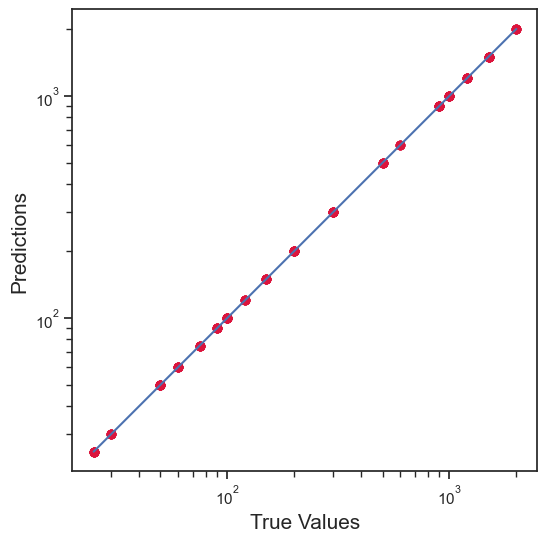

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

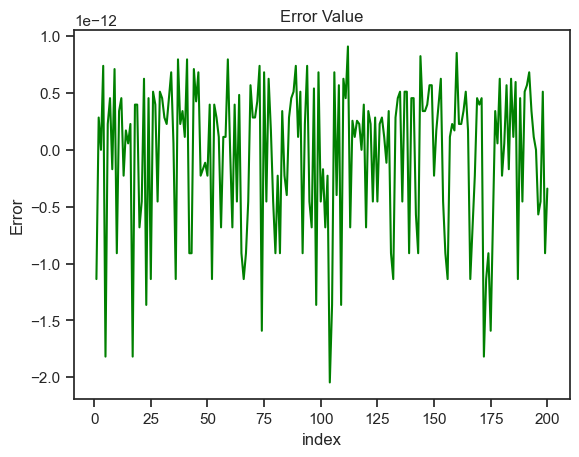

In [41]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()